# OKCupid Date a Scientist - Zodiac Sign Prediction
Given clients' dataset of OKcupid - a dating company, this project's objective is to cluster these clients into groups and try to match a couple. There is only one data file which is 'profile.csv'. The dataset consists of 31 columns which are about clients. All columns are as follows:
 - **age** numeric variable of ages of users
 - **body_type** nominal categorical variable of users' body shapes such as average, thin, a little extra, etc.
 - **diet** categorical variable of users' kinds of foods they have such as anything, vegetarian, vegan, halal, etc.
 - **drinks** categorical variable that shows how often a user drink
 - **drugs** categorical variable that shows how often a user take in  drugs        
 - **education** categorical variable of users' highest education       
 - **essay0 - essay9** These ten columns provide short answers of questions below by user
    - **essay0** My self summary
    - **essay1** What I’m doing with my life
    - **essay2** I’m really good at
    - **essay3** The first thing people usually notice about me
    - **essay4** Favorite books, movies, show, music, and food
    - **essay5** The six things I could never do without
    - **essay6** I spend a lot of time thinking about
    - **essay7** On a typical Friday night I am
    - **essay8** The most private thing I am willing to admit
    - **essay9** You should message me if…
 - **height** numeric variable of users' height in inches           
 - **income** numeric variable of users' income   
 - **job**  categorical variable of user's job       
 - **last_online** date and time when a user is last online
 - **location** categorical variable of the area in which a user lives in         
 - **offspring** categorical variable that shows kids' status of a user and their thoughts about having more kids.      
 - **orientation** categorical variable of user's gender orientation e.g. straight, gay, bisexual      
 - **pets** categorical variable that shows pets' status of a user and their thoughts about petting animal.         
 - **religion** categorical variable of user's religion      
 - **sex** categorical variable of user's sex including 'm' for male and 'f' for female.           
 - **sign** categorical varaible of user's zodiac signs such as aries, taurus, gemini    
 - **smokes** categorical variable of how often a user smokes         
 - **speaks** a short answer of user's languages 
 - **status** categorical variable of member's status such as single, available, married

In [1]:
# import necessary libraries and change some display settings.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# set the settings for all figures
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (8, 6)


# Import data

In [2]:
# import dataset from a csv file
df = pd.read_csv("profiles.csv")

# Goals
Some users believe that zodiac signs may be a good signal to indicate whether they can get along with another user given zodiac sign. However, some users do not mind about identifying their signs in their profiles. The initial goal of this project is to create a model that can predict signs for users who do not inform them. 

# Exploratory Data Analysis and Cleaning Data 

<AxesSubplot:>

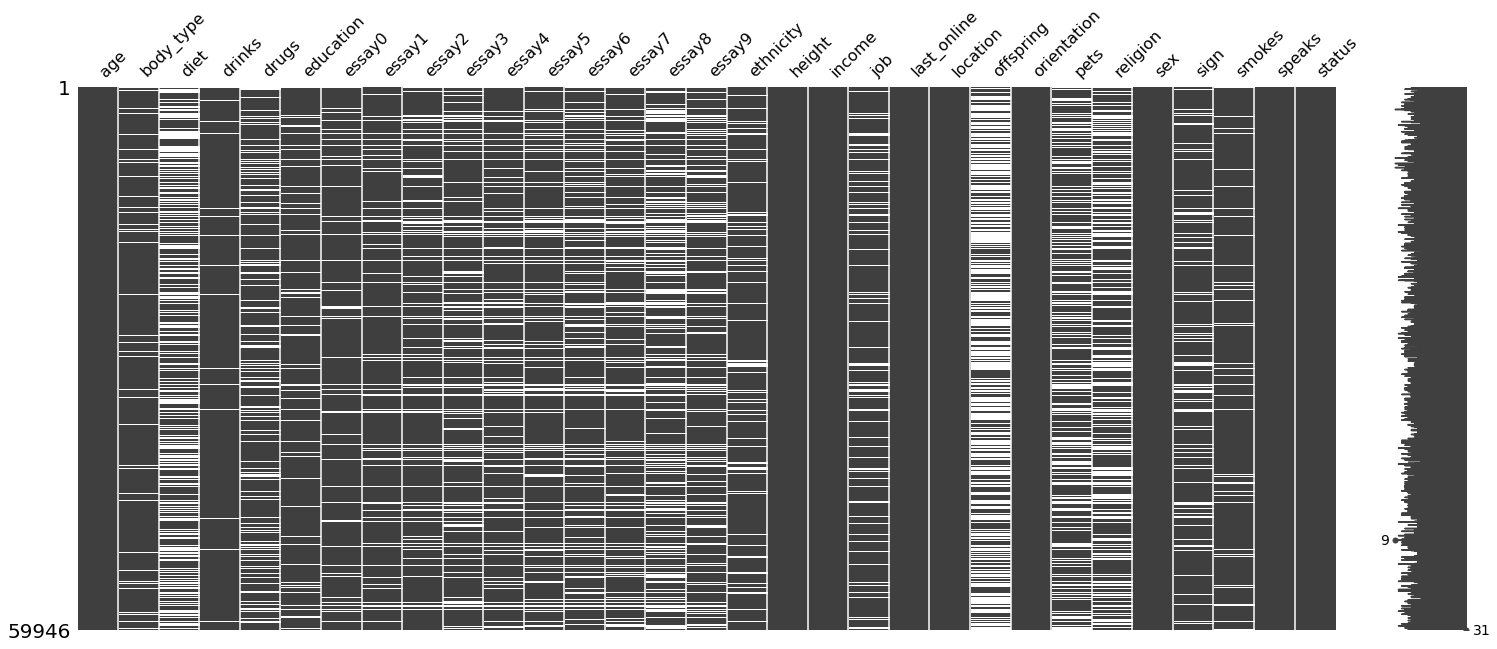

In [3]:
msno.matrix(df)

In [3]:
# check the dataset sizes
df.shape

(59946, 31)

In [4]:
# check all columns' names, their values' types and number of non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [5]:
# have a look at the first ten rows of data
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake myself a little better everyday, in some productively lazy\nway. got tired of tying my shoes. considered hiring a five year\nold, but would probably have to tie both of our shoes... decided to\nonly wear leather shoes dress shoes.<br />\n<br />\nabout you:<br />\n<br />\nyou love to have really serious, really deep conversations about\nreally silly stuff. you have to be willing to snap me out of a\nlight hearted rant with a kiss. you don't have to be funny, but you\nhave to be able to make me laugh. you should be able to bend spoons\nwith your mind, and telepathically make me smile while i am still\nat work. you should love life, and be cool with just letting the\nwind blow. extra points for reading all this and guessing my\nfavorite video game (no hints given yet). and lastly you have a\ngood attention span.","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perhaps\na hours worth of a good book or a video game on a lazy sunday.","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), catcher in the rye, the prince.<br />\n<br />\nmovies:<br />\ngladiator, operation valkyrie, the producers, down periscope.<br />\n<br />\nshows:<br />\nthe borgia, arrested development, game of thrones, monty\npython<br />\n<br />\nmusic:<br />\naesop rock, hail mary mallon, george thorogood and the delaware\ndestroyers, felt<br />\n<br />\nfood:<br />\ni'm down for anything.",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a coffee or a bite.<br />\nor if you want to talk philosophy.,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook regardless of whether i am at work.<br />\n3. i love to drink and eat foods that are probably really bad for\nme.<br />\n4. i love being around people that resemble line 1-3.<br />\ni love the outdoors and i am an avid skier. if its snowing i will\nbe in tahoe at the very least. i am a very confident and friendly.\ni'm not interested in acting or being a typical guy. i have no time\nor patience for rediculous acts of territorial pissing. overall i\nam a very likable easygoing individual. i am very adventurous and\nalways looking forward to doing new things and hopefully sha

In [6]:
# create a dataframe with numeric features
num_features = df.select_dtypes('number')

# see descriptive statistics
num_features.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


OKCupid's member were between 18-110 years old. However, half of them aged between 26-37. The height (inches) ranged from 1 to 95 inches and income started from -1 to 1 million dollars. There was some anomalies as height should not be as low as 1 inch and income should not be negative values.

In [7]:
# create a dataframe with non-numeric columns
cat_features = df.select_dtypes('object')
cat_features.describe()

,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,54650,35551,56961,45866,53318,54458,52374,50308,48470,49409,49096,46175,47495,40721,47343,54266,51748,59946,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,12,18,6,3,32,54350,51516,48635,43533,49260,48963,43603,45554,39324,45443,217,21,30123,199,15,3,15,45,2,48,5,7647,5
top,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,ask me,ask me,my future,out with friends,ask me,you want to.,white,other,2012-06-29-22-56,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,14652,16585,41780,37724,23959,12,61,82,529,16,6,161,89,45,199,32831,7589,24,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697


In [8]:
# to check the number of missing values in each column
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

## Age

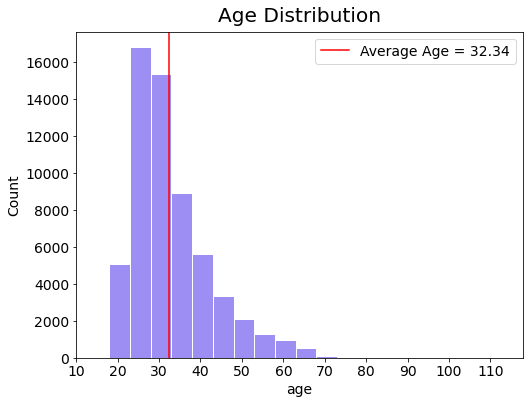

In [9]:
# find the mean of ages
avg_age = np.mean(df.age)

# create a historam of ages
sns.histplot(data =df, x='age', color='mediumslateblue', binwidth=5, edgecolor='white')
plt.axvline(avg_age, color ='red', label='Average Age = ' + str(round(avg_age,2)))
plt.title("Age Distribution", fontsize='x-large', pad=10)
plt.xticks(range(10,120,10))
plt.legend()
plt.show()

The average age of users is around 32 years old. The outliers are above 70 years old.

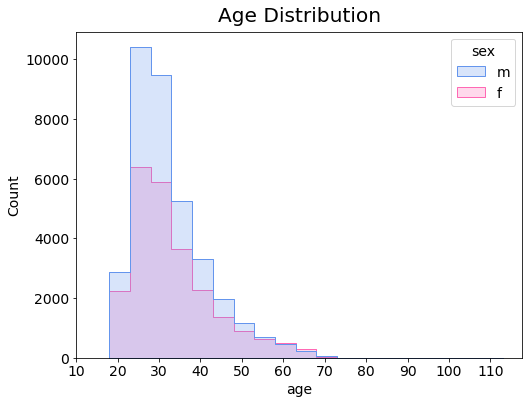

In [10]:
sns.histplot(data =df, x='age', hue='sex', element='step', binwidth=5, hue_order=['m', 'f'], palette=['cornflowerblue', 'hotpink'])
plt.title("Age Distribution", fontsize='x-large', pad=10)
plt.xticks(range(10,120,10))
plt.show()

Male users and female users had similar distribution. The majorities of both sexes ranged from 18 to just over 70 years old.  However, the difference is that there was a smaller number of female users than male users.

## Income


In [11]:
# to count each value in the column 'income'
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

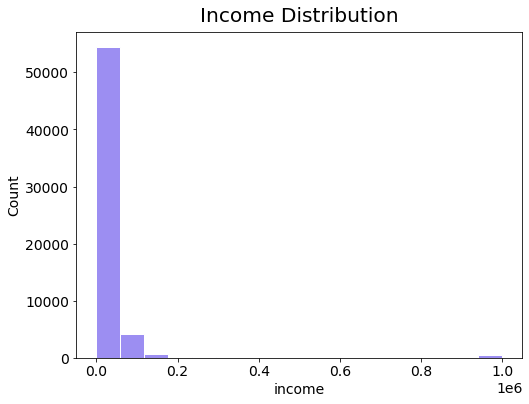

In [12]:
sns.histplot(data =df, x='income', color='mediumslateblue', edgecolor='white')
plt.title("Income Distribution", fontsize='x-large', pad=10)
plt.show()

Regarding values counts, most users did not provide their income.

# Nominal Categorical Data


## Body Type

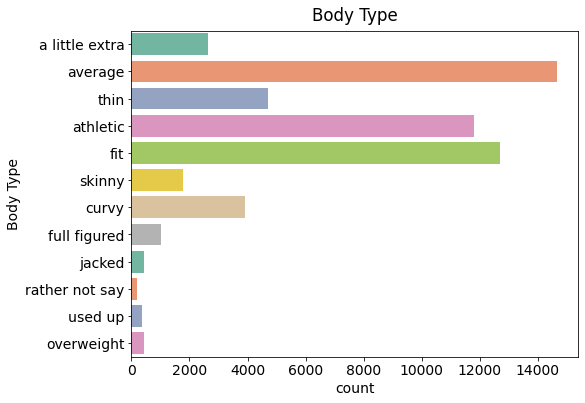

In [13]:
sns.countplot(data = df, y = 'body_type', palette = 'Set2')
plt.title("Body Type", pad=10)
plt.ylabel("Body Type")
plt.show()

## Diet

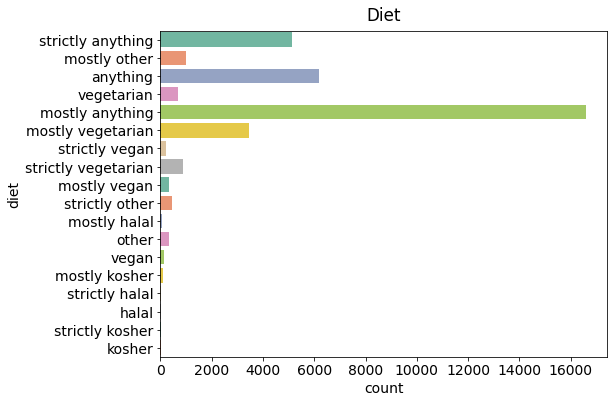

In [14]:
sns.countplot(data = df, y = 'diet', palette = 'Set2')
plt.title("Diet", pad=10)
plt.show()

## Drinks

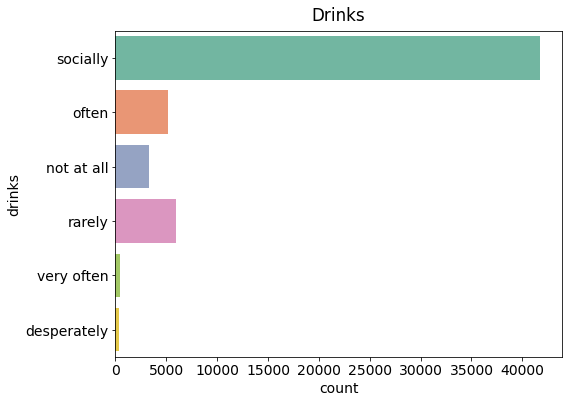

In [15]:
sns.countplot(data = df, y = 'drinks', palette = 'Set2')
plt.title("Drinks", pad=10)
plt.show()

## Drugs

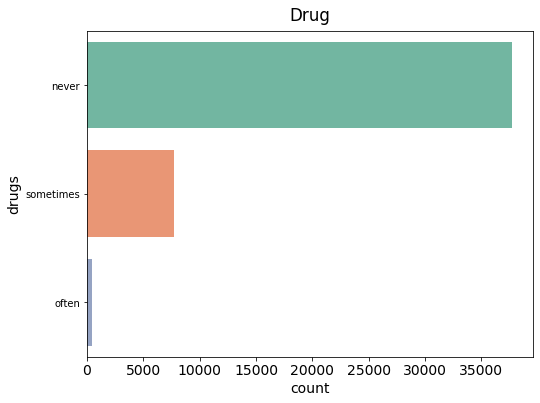

In [16]:
<p> </p>
<p> </pfig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'drugs', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Drug", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Education

In [17]:
# check a number of unique education
df.education.nunique()

32

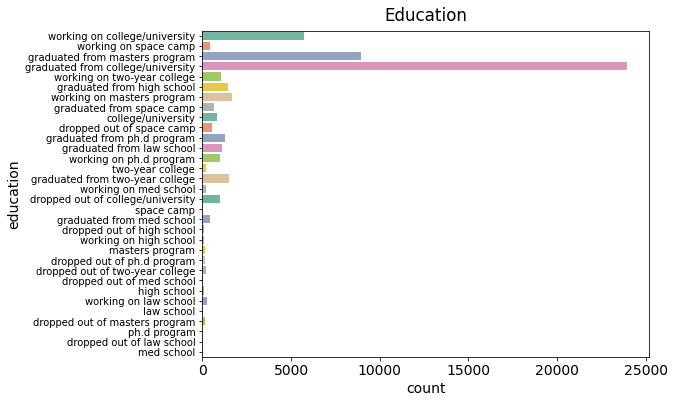

In [18]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'education', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Education", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Ethnicity

In [19]:
# count  a number of each unique ethnicity
ethnicity_counts = df.groupby('ethnicity').status.count()

# sort values by the number of count
ethnicity_counts = ethnicity_counts.sort_values(ascending=False).reset_index(name='counts')

ethnicity_counts

,ethnicity,counts
0,white,32831
1,asian,6134
2,hispanic / latin,2823
3,black,2008
4,other,1706
5,"hispanic / latin, white",1301
6,indian,1077
7,"asian, white",811
8,"white, other",641
9,pacific islander,432


Most of users are white. However, more than one ethnicity can be applied to one user. Some people might do not honestly tell what ethnicity they are as there are people being both white and black or both hispanic/latin and native american, and so on. 

## Job

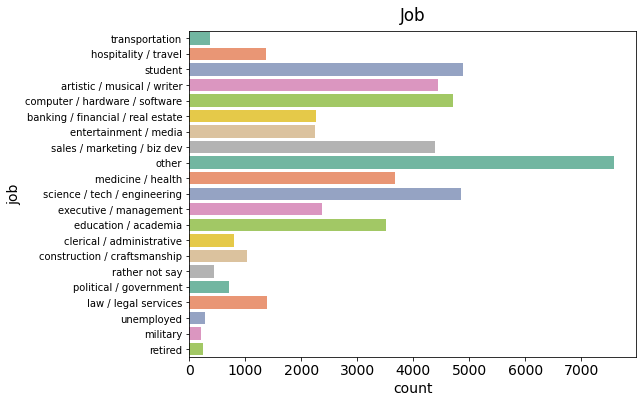

In [20]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'job', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Job", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Offspring

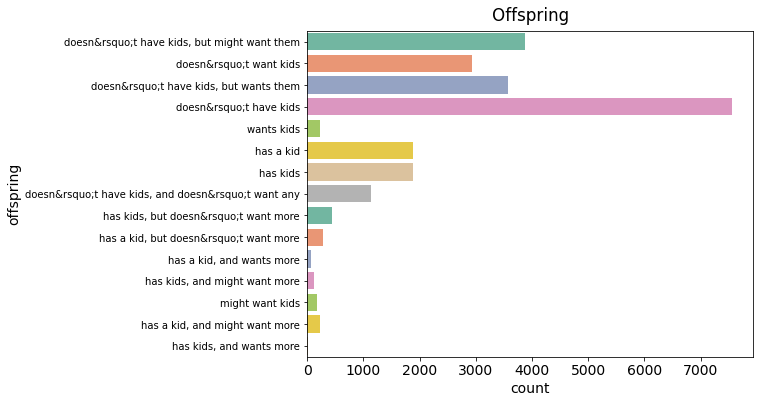

In [21]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'offspring', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Offspring", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Orientation

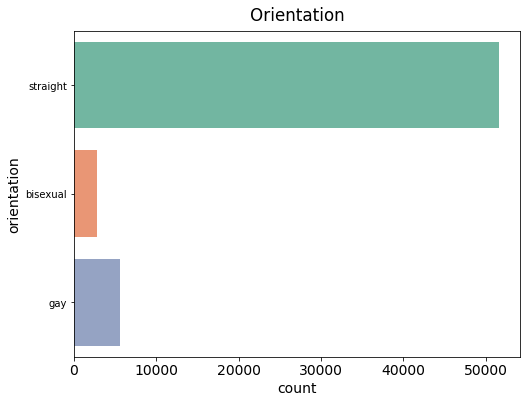

In [22]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'orientation', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Orientation", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

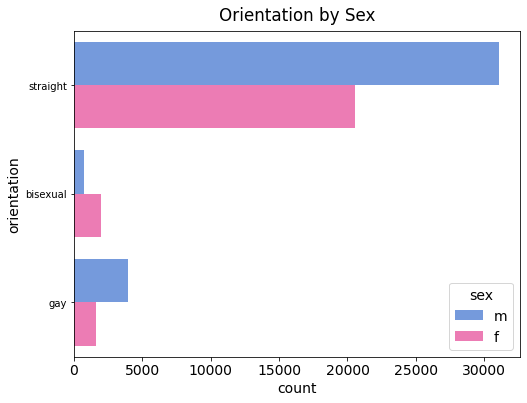

In [23]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'orientation', hue='sex', palette = ['cornflowerblue', 'hotpink'])
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Orientation by Sex", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Pets

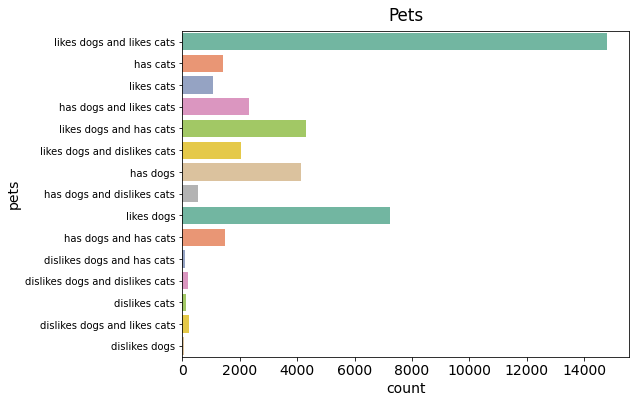

In [24]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'pets', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Pets", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Religion

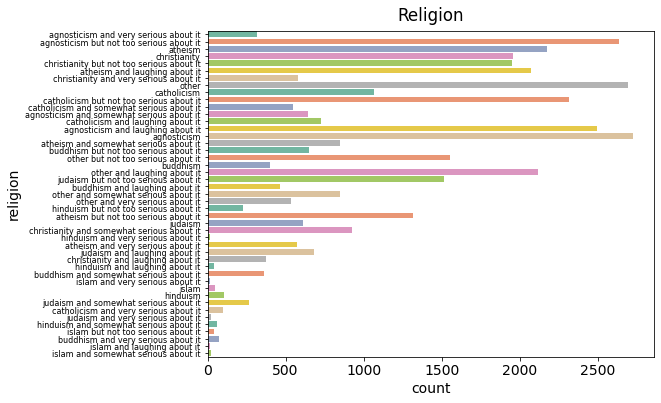

In [25]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'religion', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Religion", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=8)
plt.show()

In [26]:
df['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

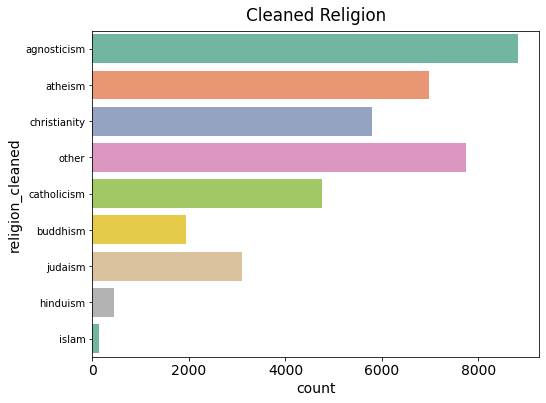

In [27]:
df['religion_cleaned'] = df.religion.str.split().str.get(0)
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'religion_cleaned', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Cleaned Religion", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Sign

In [28]:
df['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

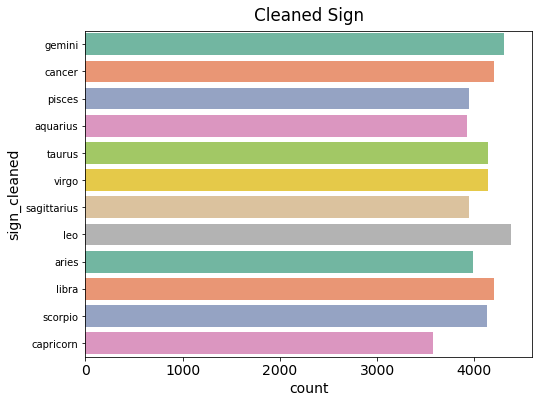

In [29]:
df['sign_cleaned'] = df.sign.str.split().str.get(0)
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'sign_cleaned', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Cleaned Sign", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Smokes

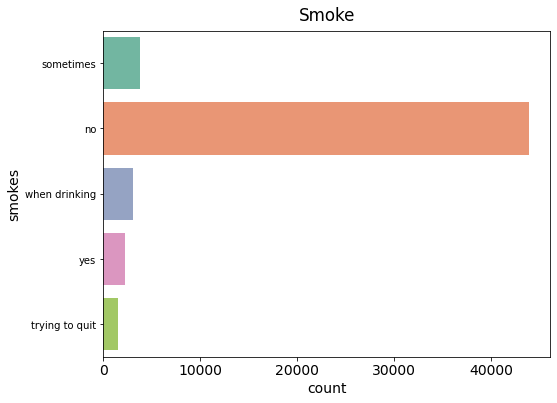

In [30]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'smokes', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Smoke", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

Before training models, the values of each categorical column used for training were checked again.

In [31]:
cat_cols = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'offspring',
 'pets', 'religion_cleaned', 'sign_cleaned', 'smokes']
for feature in cat_cols:
    uniq = df[feature].unique()
    print("{}, {} distinct values: {}".format(feature, len(uniq), uniq))
    print("\n")

body_type, 13 distinct values: ['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']


diet, 19 distinct values: ['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']


drinks, 7 distinct values: ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']


drugs, 4 distinct values: ['never' 'sometimes' nan 'often']


education, 33 distinct values: ['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out of space camp'
 'graduated from ph.d progra

# Machine Learning Models Training
In order to create a model that predict a zodiac sign for a user, only some features are used to create model. As it is  a multi-classification, four machine learning models were chosen.
  - **K Nearest Neighbors**
  - **Random Forest**
  - **Support Vector Machine**
  - **Multinomial Naive Bayes**
The first three models have the same data preparation using age and categorical columns. Meanwhile, Multinomial Naive Bayes model uses essay columns (data about users' interests in text form).

## Import Libraries for Classification

In [32]:
# import necessary tools for preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer


# Import machine learning model classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Import metrics for model evaluations
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score

## Preprocessing Data

### Section 1: Age and Categorical Columns

In [33]:
cols_to_classify = ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'job' , 
                    'offspring', 'pets', 'smokes',  'religion_cleaned', 'sign_cleaned']

In [34]:
user_data = df[cols_to_classify]
user_data = user_data.dropna()
user_data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'job',
       'offspring', 'pets', 'smokes', 'religion_cleaned', 'sign_cleaned'],
      dtype='object')

In [35]:
user_data.shape

(7404, 12)

After dropping a lot of sample including null values, the balance of all labels was checked again.

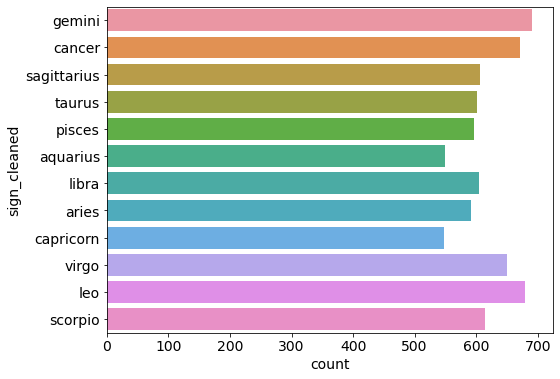

In [37]:
sns.countplot(data=user_data, y='sign_cleaned');

All the classes have quite similar numbers of samples. Hence, we can start preprocessing data.

In [38]:
# split data into user and user_labels group
user = user_data.drop('sign_cleaned', axis=1)
user_labels = user_data['sign_cleaned'].copy()

# chage user_labels from text to number
le = LabelEncoder()
user_labels = le.fit_transform(user_labels)
user_labels[:5]


array([ 4,  2,  8, 10,  7])

In [39]:
le.classes_

array(['aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo',
       'libra', 'pisces', 'sagittarius', 'scorpio', 'taurus', 'virgo'],
      dtype=object)

In [40]:
# split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(
    user, user_labels, test_size=0.2, random_state=33)

In [41]:
# prepare data using pipeline and column transformer
num_attr = ['age']
cat_attr = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job' , 'offspring', 'pets', 'smokes',  'religion_cleaned']
num_pipeline = Pipeline([('log_transform', FunctionTransformer(np.log)),('stdscaler', StandardScaler())])
cat_pipeline = Pipeline([('onehot', OneHotEncoder())])
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attr), ('cat', cat_pipeline, cat_attr)])

In [42]:
X_prepared = full_pipeline.fit_transform(X_train)

In [43]:
X_prepared.toarray()

array([[ 1.51303775,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.55759511,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28731354,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.43919044,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.46823616,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.10780945,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Training KNN Model Evaluation and Tuning

In [44]:
KNN_classifier = KNeighborsClassifier()

KNN_classifier.fit(X_prepared, y_train)
KNN_train_predictions = KNN_classifier.predict(X_prepared)
print(classification_report(y_train, KNN_train_predictions))

              precision    recall  f1-score   support

           0       0.25      0.66      0.36       438
           1       0.25      0.49      0.33       481
           2       0.32      0.46      0.38       537
           3       0.35      0.34      0.35       436
           4       0.37      0.32      0.34       536
           5       0.39      0.29      0.33       546
           6       0.39      0.24      0.30       474
           7       0.45      0.27      0.34       472
           8       0.37      0.20      0.26       483
           9       0.46      0.28      0.35       493
          10       0.43      0.24      0.31       502
          11       0.41      0.25      0.31       525

    accuracy                           0.33      5923
   macro avg       0.37      0.34      0.33      5923
weighted avg       0.37      0.33      0.33      5923



Not bad! the KNN model has average f1-score at 33%. However, this is the score on training data. The cross validation method would be used to see how the model works in generalizing.

In [46]:
# doing 5-folded cross validation and print out the f1_macro scores
print(cross_val_score(KNN_classifier, X_prepared, y_train, scoring='f1_macro', cv=5))

[0.08563802 0.08084741 0.08077205 0.06490556 0.08670129]


The KNN model works very bad on validation dataset. This might be caused by unappropriate k-value used in prediction. The default value of n_neighbors of KNeighborClassifier is 5. The model was trained with different k-values ranging from 1 to 20.

In [47]:
knn_scores = []
for k in range(1,21):
    KNN_classifier = KNeighborsClassifier(n_neighbors=k)
    KNN_classifier.fit(X_prepared, y_train)
    y_pred = KNN_classifier.predict(X_prepared)
    knn_scores.append(f1_score(y_train, y_pred, average='macro'))

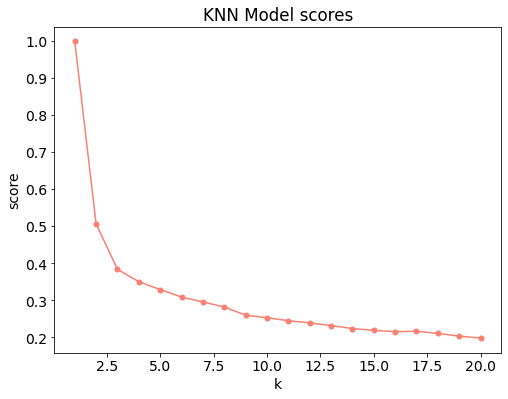

In [49]:
# plot the scores for each k
plt.plot(range(1,21), knn_scores, color='salmon', marker='o', markersize='5')
plt.title("KNN Model scores")
plt.xlabel("k")
plt.ylabel("score")
plt.show()

The model also did not work well on the training data even though the k value was changed. From the above line graph, it showed that the more k value is, the less model's score is. 

### Training Random Forest Model

In [50]:
# create a Random Forest model classifier
RF_classifier = RandomForestClassifier()

RF_classifier.fit(X_prepared, y_train)
RF_train_predictions = RF_classifier.predict(X_prepared)
print(classification_report(y_train, RF_train_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00       481
           2       1.00      1.00      1.00       537
           3       1.00      1.00      1.00       436
           4       1.00      1.00      1.00       536
           5       1.00      1.00      1.00       546
           6       1.00      1.00      1.00       474
           7       1.00      1.00      1.00       472
           8       1.00      1.00      1.00       483
           9       1.00      1.00      1.00       493
          10       1.00      1.00      1.00       502
          11       1.00      1.00      1.00       525

    accuracy                           1.00      5923
   macro avg       1.00      1.00      1.00      5923
weighted avg       1.00      1.00      1.00      5923



It is clear that the model overfitted the training data. Therefore, the model was evaluated again by cross-validation.

In [51]:
# predict training labels for training data using RF_classifier
RF_cross_val_scores = cross_val_score(RF_classifier, X_prepared, y_train, scoring='f1_macro', cv=5)
print(RF_cross_val_scores)

[0.07898762 0.09040506 0.06920739 0.08589557 0.09722759]


In [91]:
np.mean(np.array([0.07898762, 0.09040506, 0.06920739, 0.08589557, 0.09722759]
))

0.084344646

 ### Tuning Hyperparameters 
 As the random forest have some interesting hyperparameters such as max depth or max_features that can be adjusted, the GridSearchCV is used to tune those hyperparameters.

In [52]:
# check each estimator's max_depth
tree_max_depths = [estimator.tree_.max_depth for estimator in RF_classifier.estimators_]
print(tree_max_depths)

[54, 66, 67, 65, 53, 53, 64, 63, 60, 47, 55, 63, 54, 69, 56, 74, 55, 66, 57, 53, 59, 49, 55, 53, 54, 61, 59, 57, 58, 57, 55, 54, 53, 63, 57, 48, 56, 56, 54, 58, 69, 52, 59, 53, 57, 49, 71, 51, 63, 60, 62, 48, 59, 59, 55, 52, 58, 56, 57, 64, 51, 57, 61, 62, 52, 48, 64, 55, 52, 54, 51, 63, 52, 50, 65, 70, 62, 48, 55, 50, 58, 65, 65, 55, 51, 57, 56, 53, 74, 66, 61, 56, 63, 49, 52, 55, 70, 63, 57, 60]


In [56]:
from sklearn.model_selection import GridSearchCV
 
params = {'max_depth': [5,10,15,20], 
         'n_estimators':[100, 150, 200], 
          'max_features': ['auto', None],
          'bootstrap':[False],
          'min_samples_split': [100, 150, 200]}
grid_search = GridSearchCV(RF_classifier, params, cv=5)
grid_search.fit(X_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', None],
                         'min_samples_split': [100, 150, 200],
                         'n_estimators': [100, 150, 200]})

In [57]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 200,
 'n_estimators': 150}

In [58]:
grid_search.best_score_

0.08745438476451134

Even though the hyperparameters were changed to other values in GridSearchCV, the best score from the best parameters tried was still under 10%. The Random Forest model is not good enough for sign prediction.

## Training Support Vector Machine Model

In [59]:
SVM_classifier = SVC()

SVM_classifier.fit(X_prepared, y_train)
SVM_train_predictions = SVM_classifier.predict(X_prepared)

In [60]:
print(classification_report(y_train, SVM_train_predictions))

              precision    recall  f1-score   support

           0       0.61      0.25      0.35       438
           1       0.40      0.33      0.36       481
           2       0.34      0.50      0.40       537
           3       0.53      0.26      0.35       436
           4       0.36      0.53      0.43       536
           5       0.31      0.57      0.40       546
           6       0.47      0.32      0.38       474
           7       0.48      0.28      0.35       472
           8       0.44      0.33      0.38       483
           9       0.36      0.42      0.39       493
          10       0.45      0.34      0.39       502
          11       0.37      0.46      0.41       525

    accuracy                           0.39      5923
   macro avg       0.43      0.38      0.38      5923
weighted avg       0.42      0.39      0.38      5923



In [61]:
# cross-validation
print(cross_val_score(SVM_classifier, X_prepared, y_train, scoring='f1_macro', cv=5))

[0.07935611 0.08190252 0.08668656 0.09185144 0.08378437]


In [92]:
np.mean(np.array([0.07935611, 0.08190252, 0.08668656, 0.09185144, 0.08378437]))

0.0847162

It seemed that using Support Vector Machine model to predict signs does not work as well.

### Section 2 - Prediction based on Essay Columns

As there might be some underlying words that shows how people live or think, including essay columns in the dataset might generate different result.

In [62]:
#import TfidfVectorizer for preprocessing text data
from sklearn.feature_extraction.text import TfidfVectorizer

### Preprocessing data

In [73]:
cols_to_classify2 = ['sign_cleaned','essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
def create_essay_df(df, cols_to_classify2):
    data = df[cols_to_classify2]
    
    essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
    
    # drop records that have null values
    data = data.dropna()
    
    # delete all html tags, new line escape, and http links in the essay columns
    filled_df = data.replace({r'<[A-Za-z\/][^>]*>' : '', r'\n' : ' ', r'http[^ ]*[ ]' : ' ', r'http[^ ]*' : ''}, regex=True)

    # create the 'combined_essay' column by combining all the essay columns together
    filled_df['combined_essay'] = filled_df[essay_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
              
    return filled_df.drop(essay_columns, axis=1)

In [74]:
user_essay = create_essay_df(df, cols_to_classify2)

In [76]:
user_essay.shape

(26117, 2)

In [77]:
user_essay.head()

sign_cleaned  \
0        gemini   
5        taurus   
9        cancer   
10       taurus   
11          leo   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [78]:
user_essay.sign_cleaned.value_counts()

leo            2309
gemini         2299
libra          2298
cancer         2256
virgo          2223
taurus         2190
scorpio        2178
aries          2168
sagittarius    2141
pisces         2087
aquarius       2076
capricorn      1892
Name: sign_cleaned, dtype: int64

In [79]:
# split data into user and user_labels group
user2 = user_essay['combined_essay']
user_labels2 = user_essay['sign_cleaned'].copy()

# chage user_labels from text to number
le = LabelEncoder()
user_labels2 = le.fit_transform(user_labels2)
le.classes_

array(['aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo',
       'libra', 'pisces', 'sagittarius', 'scorpio', 'taurus', 'virgo'],
      dtype=object)

In [80]:
# split data into training set and testing set
training_data, testing_data, training_labels, testing_labels = train_test_split(
    user2, user_labels2, test_size=0.2, random_state=33)

In [81]:
# preprocessing data by using TfidfVectorizer
vectorizer = TfidfVectorizer()
prepared_training_data = vectorizer.fit_transform(training_data)

In [82]:
# train MultinomialNB model
classifier = MultinomialNB()
classifier.fit(prepared_training_data, training_labels)
multi_predictions = classifier.predict(prepared_training_data)
print(classification_report(training_labels, multi_predictions))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03      1643
           1       1.00      0.06      0.12      1714
           2       0.65      0.82      0.73      1836
           3       1.00      0.00      0.01      1509
           4       0.73      0.82      0.77      1834
           5       0.25      0.99      0.40      1848
           6       0.24      1.00      0.39      1853
           7       1.00      0.06      0.12      1705
           8       1.00      0.04      0.08      1688
           9       1.00      0.13      0.23      1738
          10       0.98      0.33      0.49      1779
          11       0.99      0.22      0.36      1746

    accuracy                           0.39     20893
   macro avg       0.82      0.37      0.31     20893
weighted avg       0.81      0.39      0.32     20893



In [86]:
# cross validation
print(cross_val_score(classifier, prepared_training_data, training_labels, scoring='f1_macro', cv=5))

[0.03954122 0.03614473 0.03631791 0.03703821 0.0337957 ]


'Cancer' and 'Gemini' seemed to be predicted well. However, in general the model does not work really good. Especially when doing cross validation, the f1_score was worse than other models. 

# Conclusion
All four machine learning models cannot predict signs for users very well. For training data, K-Nearest Neighbors, Random Forest, SVM, and Multinomial Naive Bayes had f1-score at 33%, 100%, 38% and 31% in turn. However, this is because of overfitting data. After testing on validation data via using cross-validation all the models cannot do better than guess which is around 8%.


# Future Work
We can investigate more if ‘Cancer’ and ‘Gemini’ can be really predicted well. Moreover, since the models are based on features provided, to increase the performance of prediction we should discuss which features should be collected more.